In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict

from ch4_metrics import evaluate_classifier

In [2]:
# transfusion dataset from https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
data = pd.read_csv('../data/transfusion.csv')
data = data.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'cc_of_blood_donated',
    'Time (months)': 'months_since_first_donation',
    'whether he/she donated blood in March 2007': 'donated_in_march_2007'
})

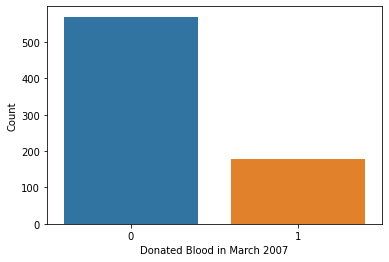

0    570
1    178
Name: donated_in_march_2007, dtype: int64


In [3]:
donated_in_march_countplot = sns.countplot(data=data, x='donated_in_march_2007')
donated_in_march_countplot.set(ylabel='Count', xlabel='Donated Blood in March 2007')
plt.show()

print(data['donated_in_march_2007'].value_counts())

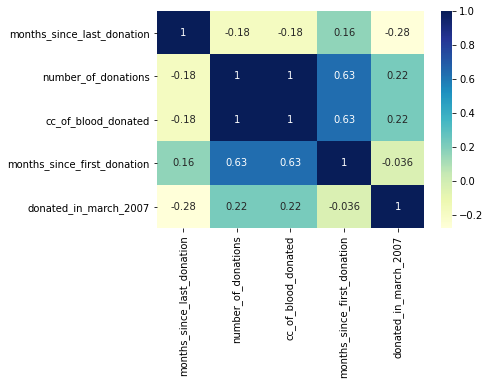

In [4]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [5]:
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

In [6]:
# full model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

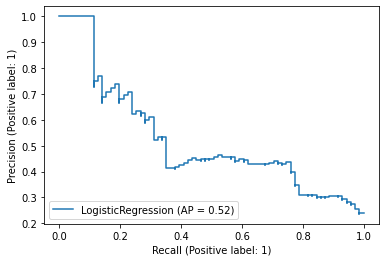

Accuracy: 0.78
Null Accuracy:0.7633333333333333


Confusion Matrix:
[[226   3]
 [ 63   8]]

F1 Score: 0.195
Precision: 0.727
Recall: 0.113


array([[-1.11837961e-01,  1.62184311e-06,  4.05460777e-04,
        -1.65302448e-02]])

In [7]:
# evaluate model using train test split
plot_precision_recall_curve(classifier, X_test, y_test)
plt.show()

evaluate_classifier(X_test, y_test, classifier)

classifier.coef_

In [8]:
# evaluate full model using stratified 10 fold cross validation on the entire dataset
y_pred = cross_val_predict(classifier, X, y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       570
           1       0.55      0.16      0.24       178

    accuracy                           0.77       748
   macro avg       0.67      0.56      0.55       748
weighted avg       0.73      0.77      0.72       748



In [9]:
# recursive feature elimination
selector = RFECV(classifier, step=1, cv=3)
selector.fit(X_train, y_train)
print(selector.ranking_)
print(selector.support_)

[1 2 1 1]
[ True False  True  True]


In [10]:
# evaluate full model using stratified 10 fold cross validation on the test set
y_pred = cross_val_predict(classifier, X_test, y_test, cv=10)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       229
           1       0.61      0.20      0.30        71

    accuracy                           0.78       300
   macro avg       0.70      0.58      0.58       300
weighted avg       0.75      0.78      0.73       300



In [11]:
# evaluate reduced model using stratified 10 fold cross validation on the test set
X_test_reduced = selector.transform(X_test)

y_pred = cross_val_predict(classifier, X_test_reduced, y_test, cv=10)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       229
           1       0.61      0.20      0.30        71

    accuracy                           0.78       300
   macro avg       0.70      0.58      0.58       300
weighted avg       0.75      0.78      0.73       300

